In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/ObesityDataSet_raw_and_data_sinthetic.csv')

In [3]:
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [4]:
df['Gender'] = df['Gender'].replace({'Female':1,
                                     'Male':0})

df['family_history_with_overweight'] = df['family_history_with_overweight'].replace({'yes':1,
                                                                                     'no':0})

df['FAVC'] = df['FAVC'].replace({'yes':1,
                                 'no':0})

df['SMOKE'] = df['SMOKE'].replace({'yes':1,
                                   'no':0})

df['SCC'] = df['SCC'].replace({'yes':1,
                              'no':0})

df['CAEC'] = df['CAEC'].replace({'no':0,
                                'Sometimes':1,
                                'Frequently':2,
                                'Always':3})

df['CALC'] = df['CALC'].replace({'no':0,
                                'Sometimes':1,
                                'Frequently':2,
                                'Always':3})

df['NObeyesdad'] = df['NObeyesdad'].replace({'Insufficient_Weight':0,
                                             'Normal_Weight':1,
                                             'Overweight_Level_I':2,
                                             'Overweight_Level_II':3,
                                             'Obesity_Type_I':4,
                                             'Obesity_Type_II':5,
                                             'Obesity_Type_III':6})

df['MTRANS'] = df['MTRANS'].replace({'Walking' : 0,
                                     'Bike' : 1,
                                     'Public_Transportation' : 2,
                                     'Automobile' : 3,
                                     'Motorbike' : 3})

<ipython-input-4-60fea3e6d254>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Gender'] = df['Gender'].replace({'Female':1,
<ipython-input-4-60fea3e6d254>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['family_history_with_overweight'] = df['family_history_with_overweight'].replace({'yes':1,
<ipython-input-4-60fea3e6d254>:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to th

In [7]:
def normalize_column(column_name):
    min_val = df[column_name].min()
    max_val = df[column_name].max()
    df[column_name] = (df[column_name] - min_val) / (max_val - min_val)
    return df[column_name]

In [8]:
df['FCVC'] = normalize_column('FCVC')
df['NCP'] = normalize_column('NCP')
df['CH2O'] = normalize_column('CH2O')
df['FAF'] = normalize_column('FAF')
df['TUE'] = normalize_column('TUE')

In [9]:
df['Age']=df['Age'].round()
df['Height']=df['Height'].round(2)
df['Weight']=df['Weight'].round(2)
df['FAF']=df['FAF'].round(2)
df['TUE']=df['TUE'].round(2)
df['CH2O']=df['CH2O'].round(2)
df['NCP']=df['NCP'].round(2)
df['FCVC']=df['FCVC'].round(2)

In [10]:
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,1,21.0,1.62,64.00,1,0,0.5,0.67,1,0,0.50,0,0.00,0.50,0,2,1
1,1,21.0,1.52,56.00,1,0,1.0,0.67,1,1,1.00,1,1.00,0.00,1,2,1
2,0,23.0,1.80,77.00,1,0,0.5,0.67,1,0,0.50,0,0.67,0.50,2,2,1
3,0,27.0,1.80,87.00,0,0,1.0,0.67,1,0,0.50,0,0.67,0.00,2,0,2
4,0,22.0,1.78,89.80,0,0,0.5,0.00,1,0,0.50,0,0.00,0.00,1,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,1,21.0,1.71,131.41,1,1,1.0,0.67,1,0,0.36,0,0.56,0.46,1,2,6
2107,1,22.0,1.75,133.74,1,1,1.0,0.67,1,0,0.50,0,0.45,0.30,1,2,6
2108,1,23.0,1.75,133.69,1,1,1.0,0.67,1,0,0.52,0,0.47,0.32,1,2,6
2109,1,24.0,1.74,133.35,1,1,1.0,0.67,1,0,0.92,0,0.38,0.30,1,2,6


## Métricas

In [11]:
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score
from sklearn.model_selection import cross_val_score


## Train Teste Split

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X = df.drop(['NObeyesdad'], axis=1)

y = df['NObeyesdad']


X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=42)

##Decision Tree

## Decision Tree - Sem grid

In [14]:
from sklearn.tree import DecisionTreeClassifier

In [15]:
modeldtc = DecisionTreeClassifier(criterion='gini',
                                  splitter='best',
                                  min_samples_leaf=1,
                                  min_samples_split=2,
                                  min_weight_fraction_leaf=0.0,
                                  min_impurity_decrease=0.0,
                                  ccp_alpha=0.0,
                                  random_state=42)

In [16]:
modeldtc.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
cross_val_score(modeldtc, X, y, cv=5)

array([0.84160757, 0.93127962, 0.94312796, 0.95734597, 0.96445498])

In [17]:
ydtc_pred_test = modeldtc.predict(X_test)
ydtc_pred_train = modeldtc.predict(X_train)

accuracy_dtc_test = accuracy_score(y_test, ydtc_pred_test)
accuracy_dtc_train = accuracy_score(y_train, ydtc_pred_train)

print(f"Accuracy no conjunto de teste: {accuracy_dtc_test:.2f}")
print(classification_report(y_test, ydtc_pred_test))
cmdtc = confusion_matrix(y_test, ydtc_pred_test)

TPdtc = cmdtc[1, 1]  # Verdadeiros Positivos
TNdtc = cmdtc[0, 0]  # Verdadeiros Negativos
FPdtc = cmdtc[0, 1]  # Falsos Positivos
FNdtc = cmdtc[1, 0]  # Falsos Negativos

TPRdtc = TPdtc / (TPdtc + FNdtc)  # Taxa de Verdadeiros Positivos
TNRdtc = TNdtc / (TNdtc + FPdtc)  # Taxa de Verdadeiros Negativos

print(f"Taxa de Verdadeiros Positivos (TPR): {TPRdtc:.2f}")
print(f"Taxa de Verdadeiros Negativos (TNR): {TNRdtc:.2f}\n")

print(f"Accuracy no conjunto de treino: {accuracy_dtc_train:.2f}")
print(classification_report(y_train, ydtc_pred_train))
cmdtc = confusion_matrix(y_train, ydtc_pred_train)

TPdtc = cmdtc[1, 1]  # Verdadeiros Positivos
TNdtc = cmdtc[0, 0]  # Verdadeiros Negativos
FPdtc = cmdtc[0, 1]  # Falsos Positivos
FNdtc = cmdtc[1, 0]  # Falsos Negativos

TPRdtc = TPdtc / (TPdtc + FNdtc)  # Taxa de Verdadeiros Positivos
TNRdtc = TNdtc / (TNdtc + FPdtc)  # Taxa de Verdadeiros Negativos

print(f"Taxa de Verdadeiros Positivos (TPR): {TPRdtc:.2f}")
print(f"Taxa de Verdadeiros Negativos (TNR): {TNRdtc:.2f}")


Accuracy no conjunto de teste: 0.93
              precision    recall  f1-score   support

           0       0.91      0.98      0.94        86
           1       0.84      0.84      0.84        93
           2       0.88      0.82      0.85        88
           3       0.93      0.96      0.94        79
           4       0.98      0.93      0.95       102
           5       0.93      0.97      0.95        88
           6       1.00      0.99      0.99        98

    accuracy                           0.93       634
   macro avg       0.92      0.93      0.92       634
weighted avg       0.93      0.93      0.93       634

Taxa de Verdadeiros Positivos (TPR): 0.91
Taxa de Verdadeiros Negativos (TNR): 0.98

Accuracy no conjunto de treino: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       186
           1       1.00      1.00      1.00       194
           2       1.00      1.00      1.00       202
           3       1.00     

## Decision Tree - Com grid

In [18]:
from sklearn.model_selection import GridSearchCV

In [19]:
modeldtc = DecisionTreeClassifier(random_state=42)

In [20]:
param_grid_dtc = {'criterion':['gini', 'entropy', 'log_loss'],
                  'splitter': ['best', 'random'],
                  'min_samples_leaf':[1, 2, 3],
                  'min_samples_split' : [2, 4],
                  'min_weight_fraction_leaf' : [0.0, 0.01, 0.05, 0.1],
                  'min_impurity_decrease' : [0.0, 0.001, 0.01, 0.05],
                  'ccp_alpha' : [0.0, 0.001, 0.01, 0.1, 0.2]}

In [21]:
grid_search = GridSearchCV(modeldtc, param_grid_dtc, cv=5)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'ccp_alpha': [0.0, 0.001, 0.01, 0.1, 0.2],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'min_impurity_decrease': [0.0, 0.001, 0.01, 0.05],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 4],
                         'min_weight_fraction_leaf': [0.0, 0.01, 0.05, 0.1],
                         'splitter': ['best', 'random']})

In [22]:
print(f'Melhores parâmetros: {grid_search.best_params_}')
print(f'Acurácia média no melhor modelo (conjunto de treino): {grid_search.best_score_:.4f}')

Melhores parâmetros: {'ccp_alpha': 0.0, 'criterion': 'entropy', 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 4, 'min_weight_fraction_leaf': 0.0, 'splitter': 'best'}
Acurácia média no melhor modelo (conjunto de treino): 0.9418


In [23]:
best_model = grid_search.best_estimator_

ydtc_grid_pred_train = best_model.predict(X_train)
ydtc_grid_pred_test = best_model.predict(X_test)

test_accuracy = best_model.score(X_test, y_test)
train_accuracy = best_model.score(X_train, y_train)

print(f"Accuracy no conjunto de teste: {test_accuracy:.2f}")
print(classification_report(y_test, ydtc_grid_pred_test))
cmdtc = confusion_matrix(y_test, ydtc_grid_pred_test)

TPdtc = cmdtc[1, 1]  # Verdadeiros Positivos
TNdtc = cmdtc[0, 0]  # Verdadeiros Negativos
FPdtc = cmdtc[0, 1]  # Falsos Positivos
FNdtc = cmdtc[1, 0]  # Falsos Negativos

TPRdtc = TPdtc / (TPdtc + FNdtc)  # Taxa de Verdadeiros Positivos
TNRdtc = TNdtc / (TNdtc + FPdtc)  # Taxa de Verdadeiros Negativos

print(f"Taxa de Verdadeiros Positivos (TPR): {TPRdtc:.2f}")
print(f"Taxa de Verdadeiros Negativos (TNR): {TNRdtc:.2f}\n")

print(f"Accuracy no conjunto de treino: {train_accuracy:.2f}")
print(classification_report(y_train, ydtc_grid_pred_train))
cmdtc = confusion_matrix(y_train, ydtc_grid_pred_train)

TPdtc = cmdtc[1, 1]  # Verdadeiros Positivos
TNdtc = cmdtc[0, 0]  # Verdadeiros Negativos
FPdtc = cmdtc[0, 1]  # Falsos Positivos
FNdtc = cmdtc[1, 0]  # Falsos Negativos

TPRdtc = TPdtc / (TPdtc + FNdtc)  # Taxa de Verdadeiros Positivos
TNRdtc = TNdtc / (TNdtc + FPdtc)  # Taxa de Verdadeiros Negativos

print(f"Taxa de Verdadeiros Positivos (TPR): {TPRdtc:.2f}")
print(f"Taxa de Verdadeiros Negativos (TNR): {TNRdtc:.2f}")

Accuracy no conjunto de teste: 0.93
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        86
           1       0.81      0.81      0.81        93
           2       0.84      0.86      0.85        88
           3       0.99      0.96      0.97        79
           4       1.00      0.94      0.97       102
           5       0.94      1.00      0.97        88
           6       1.00      0.99      0.99        98

    accuracy                           0.93       634
   macro avg       0.93      0.93      0.93       634
weighted avg       0.93      0.93      0.93       634

Taxa de Verdadeiros Positivos (TPR): 0.93
Taxa de Verdadeiros Negativos (TNR): 0.93

Accuracy no conjunto de treino: 1.00
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       186
           1       0.99      1.00      1.00       194
           2       1.00      1.00      1.00       202
           3       0.99     

## Gradient Boosting

## Gradient Boosting - Sem grid

In [24]:
from sklearn.ensemble import GradientBoostingClassifier

In [25]:
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [ ]:
cross_val_score(gb_model, X, y, cv=5)

array([0.79432624, 0.98341232, 0.98815166, 0.97630332, 0.97867299])

In [26]:
ygb_pred_test = gb_model.predict(X_test)
ygb_pred_train = gb_model.predict(X_train)

accuracy_gb_test = accuracy_score(y_test, ygb_pred_test)
accuracy_gb_train = accuracy_score(y_train, ygb_pred_train)

print(f"Accuracy Test: {accuracy_gb_test:.2f}")
print(classification_report(y_test, ygb_pred_test))
cmgb = confusion_matrix(y_test, ygb_pred_test)

TPgb = cmdtc[1, 1]  # Verdadeiros Positivos
TNgb = cmdtc[0, 0]  # Verdadeiros Negativos
FPgb = cmdtc[0, 1]  # Falsos Positivos
FNgb = cmdtc[1, 0]  # Falsos Negativos

TPRgb = TPgb / (TPgb + FNgb)  # Taxa de Verdadeiros Positivos
TNRgb = TNgb / (TNgb + FPgb)  # Taxa de Verdadeiros Negativos

print(f"Taxa de Verdadeiros Positivos (TPR): {TPRgb:.2f}")
print(f"Taxa de Verdadeiros Negativos (TNR): {TNRgb:.2f}\n")

print(f"Accuracy Train: {accuracy_gb_train:.2f}")
print(classification_report(y_train, ygb_pred_train))
cmgb = confusion_matrix(y_train, ygb_pred_train)

TPgb = cmgb[1, 1]  # Verdadeiros Positivos
TNgb = cmgb[0, 0]  # Verdadeiros Negativos
FPgb = cmgb[0, 1]  # Falsos Positivos
FNgb = cmgb[1, 0]  # Falsos Negativos

TPRgb = TPgb / (TPgb + FNgb)  # Taxa de Verdadeiros Positivos
TNRgb = TNgb / (TNgb + FPgb)  # Taxa de Verdadeiros Negativos

print(f"Taxa de Verdadeiros Positivos (TPR): {TPRgb:.2f}")
print(f"Taxa de Verdadeiros Negativos (TNR): {TNRgb:.2f}")

Accuracy Test: 0.95
              precision    recall  f1-score   support

           0       0.94      0.98      0.96        86
           1       0.93      0.86      0.89        93
           2       0.85      0.93      0.89        88
           3       0.97      0.96      0.97        79
           4       0.97      0.93      0.95       102
           5       0.96      0.98      0.97        88
           6       1.00      0.99      0.99        98

    accuracy                           0.95       634
   macro avg       0.95      0.95      0.95       634
weighted avg       0.95      0.95      0.95       634

Taxa de Verdadeiros Positivos (TPR): 1.00
Taxa de Verdadeiros Negativos (TNR): 0.99

Accuracy Train: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       186
           1       1.00      1.00      1.00       194
           2       1.00      1.00      1.00       202
           3       1.00      1.00      1.00       211
      

## Gradient Boosting - Com grid

In [27]:
model_gb = GradientBoostingClassifier(random_state=42)

In [ ]:
param_grid_gb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 0.9, 1.0],
    'max_features': [None, 'sqrt', 'log2']
}

In [ ]:
grid_search = GridSearchCV(model_gb, param_grid_gb, cv=5)
grid_search.fit(X_train,y_train)

In [ ]:
print(f'Melhores parâmetros: {grid_search.best_params_}')
print(f'Acurácia média no melhor modelo (conjunto de treino): {grid_search.best_score_:.4f}')

In [ ]:
best_model = grid_search.best_estimator_
test_accuracy = best_model.score(X_test, y_test)
train_accuracy = best_model.score(X_train, y_train)
print(f'Acurácia no conjunto de teste: {test_accuracy:.4f}')
print(f'Acurácia no conjunto de treino: {train_accuracy:.4f}')

## XG Boost - Sem grid

In [28]:
import xgboost as xgb

In [29]:
xgb_model = xgb.XGBClassifier(objective='binary:logistic',
                             n_estimators=100,
                             learning_rate=0.1,
                             max_depth=5,
                             n_jobs=16,
                             random_state=42)

xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=16,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
cross_val_score(xgb_model, X, y, cv=5)

array([0.83451537, 0.97630332, 0.98341232, 0.98578199, 0.98104265])

In [30]:
yxgb_pred_test = xgb_model.predict(X_test)
yxgb_pred_train = xgb_model.predict(X_train)

accuracy_xgb_test = accuracy_score(y_test, yxgb_pred_test)
accuracy_xgb_train = accuracy_score(y_train, yxgb_pred_train)

print(f"Accuracy Test: {accuracy_xgb_test:.2f}")
print(classification_report(y_test, yxgb_pred_test))
cmgb = confusion_matrix(y_test, yxgb_pred_test)

TPxgb = cmdtc[1, 1]  # Verdadeiros Positivos
TNxgb = cmdtc[0, 0]  # Verdadeiros Negativos
FPxgb = cmdtc[0, 1]  # Falsos Positivos
FNxgb = cmdtc[1, 0]  # Falsos Negativos

TPRxgb = TPxgb / (TPxgb + FNxgb)  # Taxa de Verdadeiros Positivos
TNRxgb = TNxgb / (TNxgb + FPxgb)  # Taxa de Verdadeiros Negativos

print(f"Taxa de Verdadeiros Positivos (TPR): {TPRxgb:.2f}")
print(f"Taxa de Verdadeiros Negativos (TNR): {TNRxgb:.2f}\n")

print(f"Accuracy Train: {accuracy_xgb_train:.2f}")
print(classification_report(y_train, yxgb_pred_train))
cmxgb = confusion_matrix(y_train, yxgb_pred_train)

TPxgb = cmxgb[1, 1]  # Verdadeiros Positivos
TNxgb = cmxgb[0, 0]  # Verdadeiros Negativos
FPxgb = cmxgb[0, 1]  # Falsos Positivos
FNxgb = cmxgb[1, 0]  # Falsos Negativos

TPRxgb = TPxgb / (TPxgb + FNxgb)  # Taxa de Verdadeiros Positivos
TNRxgb = TNxgb / (TNxgb + FPxgb)  # Taxa de Verdadeiros Negativos

print(f"Taxa de Verdadeiros Positivos (TPR): {TPRxgb:.2f}")
print(f"Taxa de Verdadeiros Negativos (TNR): {TNRxgb:.2f}")

Accuracy Test: 0.96
              precision    recall  f1-score   support

           0       0.94      0.98      0.96        86
           1       0.93      0.88      0.91        93
           2       0.88      0.93      0.91        88
           3       0.97      0.97      0.97        79
           4       0.99      0.96      0.98       102
           5       0.98      0.99      0.98        88
           6       1.00      0.99      0.99        98

    accuracy                           0.96       634
   macro avg       0.96      0.96      0.96       634
weighted avg       0.96      0.96      0.96       634

Taxa de Verdadeiros Positivos (TPR): 1.00
Taxa de Verdadeiros Negativos (TNR): 0.99

Accuracy Train: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       186
           1       1.00      1.00      1.00       194
           2       1.00      1.00      1.00       202
           3       1.00      1.00      1.00       211
      

## XGBoost - Com grid

In [ ]:
model_xgb = xgb.XGBClassifier(random_state=42)

In [ ]:
param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.5],
    'reg_alpha': [0, 0.1, 1],
    'reg_lambda': [1, 1.5, 2],
}

In [ ]:
grid_search = GridSearchCV(model_xgb, param_grid_xgb, cv=5)
grid_search.fit(X_train,y_train)

In [ ]:
print(f'Melhores parâmetros: {grid_search.best_params_}')
print(f'Acurácia média no melhor modelo (conjunto de treino): {grid_search.best_score_:.4f}')

In [ ]:
best_model = grid_search.best_estimator_
test_accuracy = best_model.score(X_test, y_test)
train_accuracy = best_model.score(X_train, y_train)
print(f'Acurácia no conjunto de teste: {test_accuracy:.4f}')
print(f'Acurácia no conjunto de treino: {train_accuracy:.4f}')

In [130]:
xp = df.drop('Weight', axis=1)
yp = df['Weight']

xp_treino, xp_teste, yp_treino, yp_teste = train_test_split(xp,yp,test_size=0.3,random_state=42)

In [145]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error, root_mean_squared_error, r2_score

gb_modelp = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=100,
    max_depth=5,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=1.5,
    reg_lambda=1.7,
    random_state=42
)

gb_modelp.fit(xp_treino, yp_treino)

y_predgbp = gb_modelp.predict(xp_teste)
y_predgbp_treino = gb_modelp.predict(xp_treino)

In [146]:
print(f'Métricas do conjunto de teste:\n')
print(f'MAE: {mean_absolute_error(yp_teste, y_predgbp)}')
print(f'MSE: {mean_squared_error(yp_teste, y_predgbp)}')
print(f'RMSE: {root_mean_squared_error(yp_teste, y_predgbp)}')
print(f'R2_Score: {r2_score(yp_teste, y_predgbp)}\n')

print(f'Métricas do conjunto de treino:\n')
print(f'MAE: {mean_absolute_error(yp_treino, y_predgbp_treino)}')
print(f'MSE: {mean_squared_error(yp_treino, y_predgbp_treino)}')
print(f'RMSE: {root_mean_squared_error(yp_treino, y_predgbp_treino)}')

Métricas do conjunto de teste:

MAE: 2.408600372651398
MSE: 14.857400680167887
RMSE: 3.8545298909423296
R2_Score: 0.979227349495787

Métricas do conjunto de treino:

MAE: 1.7010708890900712
MSE: 5.880391131913807
RMSE: 2.4249517792966127


In [147]:
print(f'Validação cruzada K-fold:\n')
print(f'R2_Score: {r2_score(yp_treino, y_predgbp_treino)}')
print(f'Scores: {cross_val_score(gb_modelp, xp, yp, cv=5)}\n')
print(f'Média dos Scores: {cross_val_score(gb_modelp, xp, yp, cv=5).mean()}')
print(f'Desvio padrão dos Scores: {cross_val_score(gb_modelp, xp, yp, cv=5).std()}')

Validação cruzada K-fold:

R2_Score: 0.9912602487147347
Scores: [0.8592213  0.94602051 0.90788727 0.97363043 0.83316389]

Média dos Scores: 0.90398468035724
Desvio padrão dos Scores: 0.052253453775431884


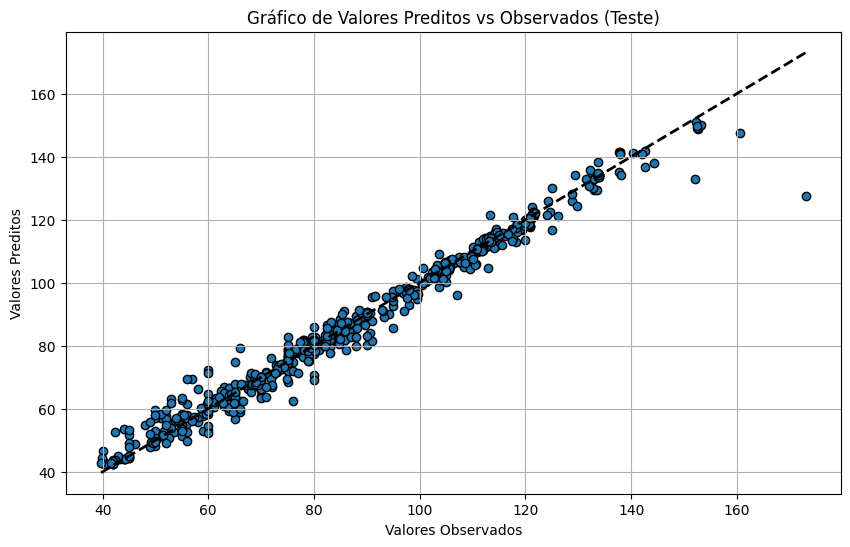

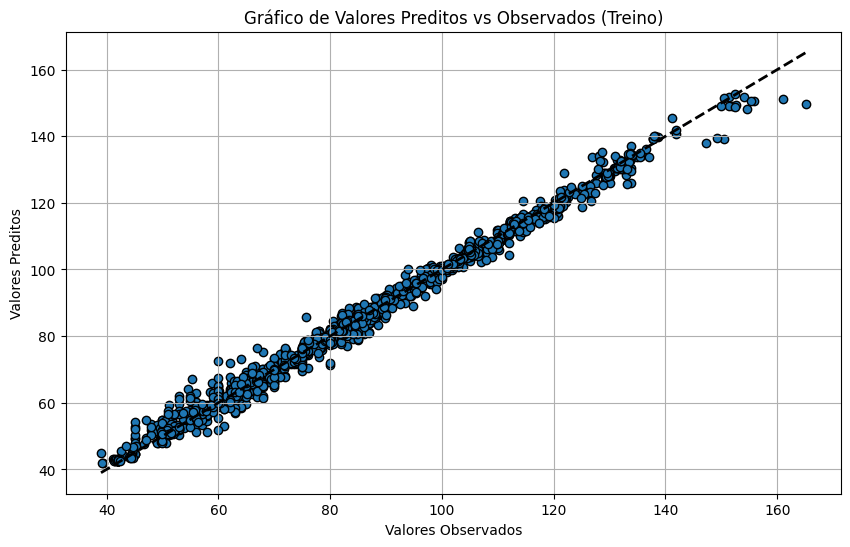

In [148]:
plt.figure(figsize=(10, 6))
plt.scatter(yp_teste, y_predgbp, edgecolors=(0, 0, 0))
plt.plot([yp_teste.min(), yp_teste.max()], [yp_teste.min(), yp_teste.max()], 'k--', lw=2)
plt.xlabel('Valores Observados')
plt.ylabel('Valores Preditos')
plt.title('Gráfico de Valores Preditos vs Observados (Teste)')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(yp_treino, y_predgbp_treino, edgecolors=(0, 0, 0))
plt.plot([yp_treino.min(), yp_treino.max()], [yp_treino.min(), yp_treino.max()], 'k--', lw=2)
plt.xlabel('Valores Observados')
plt.ylabel('Valores Preditos')
plt.title('Gráfico de Valores Preditos vs Observados (Treino)')
plt.grid(True)
plt.show()

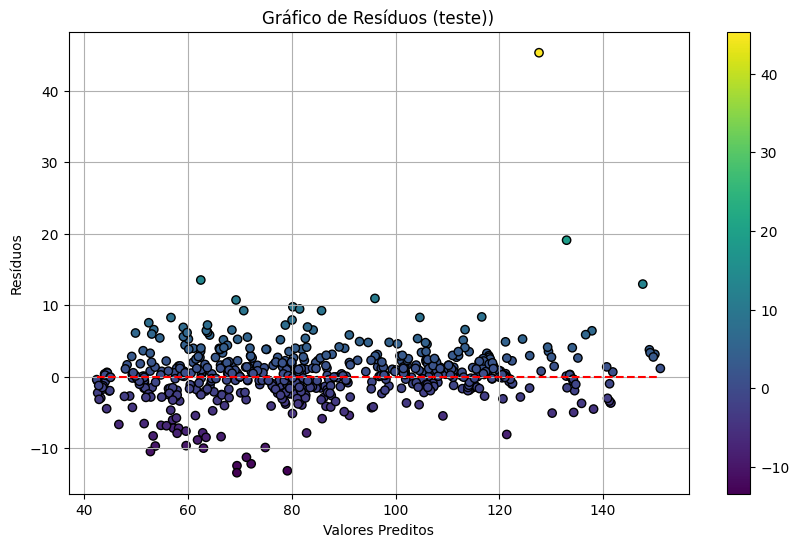

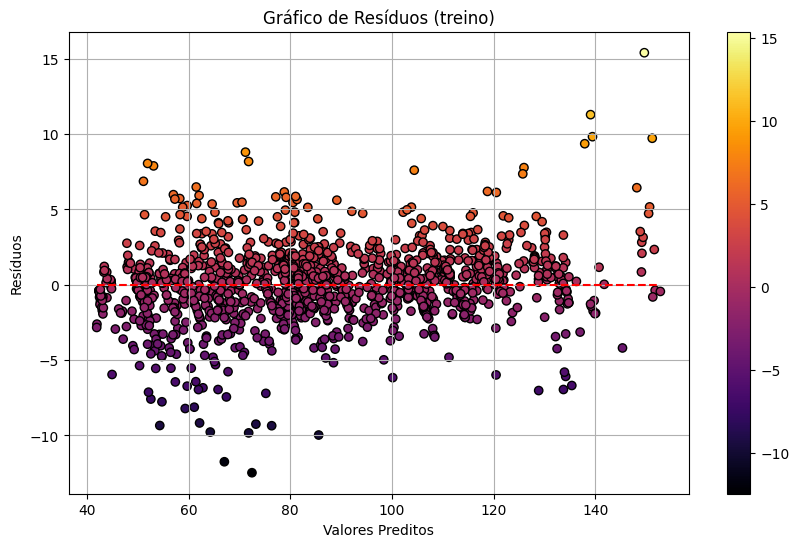

In [150]:
residuos = yp_teste - y_predgbp

plt.figure(figsize=(10, 6))
scatter = plt.scatter(y_predgbp, residuos, c=residuos, cmap='viridis', edgecolors='black')
plt.hlines(y=0, xmin=y_predgbp.min(), xmax=y_predgbp.max(), colors='r', linestyles='dashed')
plt.xlabel('Valores Preditos')
plt.ylabel('Resíduos')
plt.title('Gráfico de Resíduos (teste))')
plt.colorbar(scatter)
plt.grid(True)
plt.show()

residuos_treino = yp_treino - y_predgbp_treino

plt.figure(figsize=(10, 6))
scatter = plt.scatter(y_predgbp_treino, residuos_treino, c=residuos_treino, cmap='inferno', edgecolors='black')
plt.hlines(y=0, xmin=y_predgbp_treino.min(), xmax=y_predgbp_treino.max(), colors='r', linestyles='dashed')
plt.xlabel('Valores Preditos')
plt.ylabel('Resíduos')
plt.title('Gráfico de Resíduos (treino)')
plt.colorbar(scatter)
plt.grid(True)
plt.show()

## COM TRATAMENTO DE OUTLIERS

In [162]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_norm = scaler.fit_transform(df)
df_norm = pd.DataFrame(df_norm, columns=df.columns)
outliers = (df_norm.abs() > 3)
outlier_indices = df_scaled[(df_scaled.abs() > 3).any(axis=1)].index
print("\nÍndices dos outliers:", outlier_indices)
df_alt = df.drop(outlier_indices, axis=0)


Índices dos outliers: Index([   1,    3,   11,   15,   18,   20,   21,   25,   26,   28,
       ...
       1583, 1584, 1649, 1650, 1675, 1676, 1727, 1728, 1763, 1764],
      dtype='int64', length=238)


In [161]:
xp = df_alt.drop('Weight', , axis=1)
yp = df_alt['Weight']

xp_treino, xp_teste, yp_treino, yp_teste = train_test_split(xp,yp,test_size=0.3,random_state=42)

gb_modelp = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=100,
    max_depth=5,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=1.5,
    reg_lambda=1.7,
    random_state=42
)

gb_modelp.fit(xp_treino, yp_treino)

y_predgbp = gb_modelp.predict(xp_teste)
y_predgbp_treino = gb_modelp.predict(xp_treino)

print(f'Métricas do conjunto de teste:\n')
print(f'MAE: {mean_absolute_error(yp_teste, y_predgbp)}')
print(f'MSE: {mean_squared_error(yp_teste, y_predgbp)}')
print(f'RMSE: {root_mean_squared_error(yp_teste, y_predgbp)}')
print(f'R2_Score: {r2_score(yp_teste, y_predgbp)}\n')

print(f'Métricas do conjunto de treino:\n')
print(f'MAE: {mean_absolute_error(yp_treino, y_predgbp_treino)}')
print(f'MSE: {mean_squared_error(yp_treino, y_predgbp_treino)}')
print(f'RMSE: {root_mean_squared_error(yp_treino, y_predgbp_treino)}')

Métricas do conjunto de teste:

MAE: 2.1166741595828236
MSE: 9.328966843604151
RMSE: 3.054335745068664
R2_Score: 0.9871223944388565

Métricas do conjunto de treino:

MAE: 1.6161694721189914
MSE: 5.496385461755996
RMSE: 2.344437131116123


In [163]:
print(f'Validação cruzada K-fold:\n')
print(f'R2_Score: {r2_score(yp_treino, y_predgbp_treino)}')
print(f'Scores: {cross_val_score(gb_modelp, xp, yp, cv=5)}\n')
print(f'Média dos Scores: {cross_val_score(gb_modelp, xp, yp, cv=5).mean()}')
print(f'Desvio padrão dos Scores: {cross_val_score(gb_modelp, xp, yp, cv=5).std()}')

Validação cruzada K-fold:

R2_Score: 0.9917652182593109
Scores: [0.81239338 0.93597649 0.92442104 0.95885428 0.75826481]

Média dos Scores: 0.8779819975895119
Desvio padrão dos Scores: 0.07835093180810247


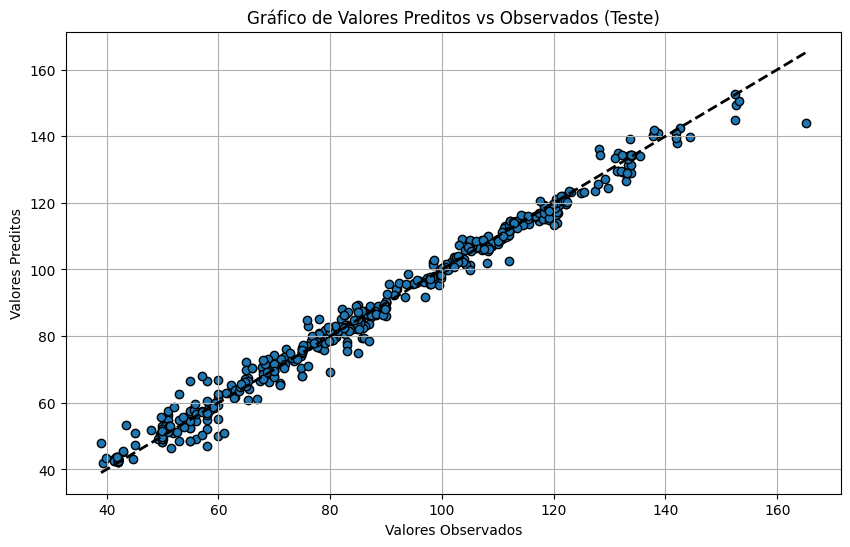

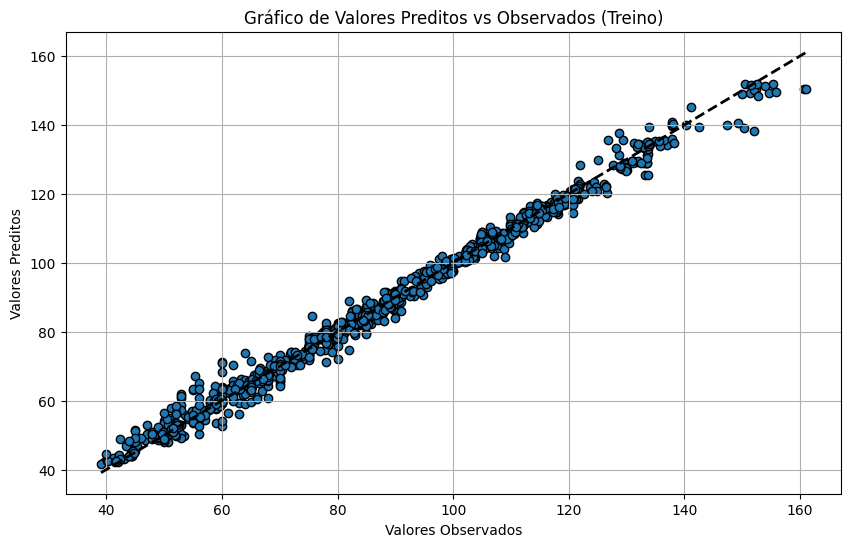

In [164]:
plt.figure(figsize=(10, 6))
plt.scatter(yp_teste, y_predgbp, edgecolors=(0, 0, 0))
plt.plot([yp_teste.min(), yp_teste.max()], [yp_teste.min(), yp_teste.max()], 'k--', lw=2)
plt.xlabel('Valores Observados')
plt.ylabel('Valores Preditos')
plt.title('Gráfico de Valores Preditos vs Observados (Teste)')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(yp_treino, y_predgbp_treino, edgecolors=(0, 0, 0))
plt.plot([yp_treino.min(), yp_treino.max()], [yp_treino.min(), yp_treino.max()], 'k--', lw=2)
plt.xlabel('Valores Observados')
plt.ylabel('Valores Preditos')
plt.title('Gráfico de Valores Preditos vs Observados (Treino)')
plt.grid(True)
plt.show()

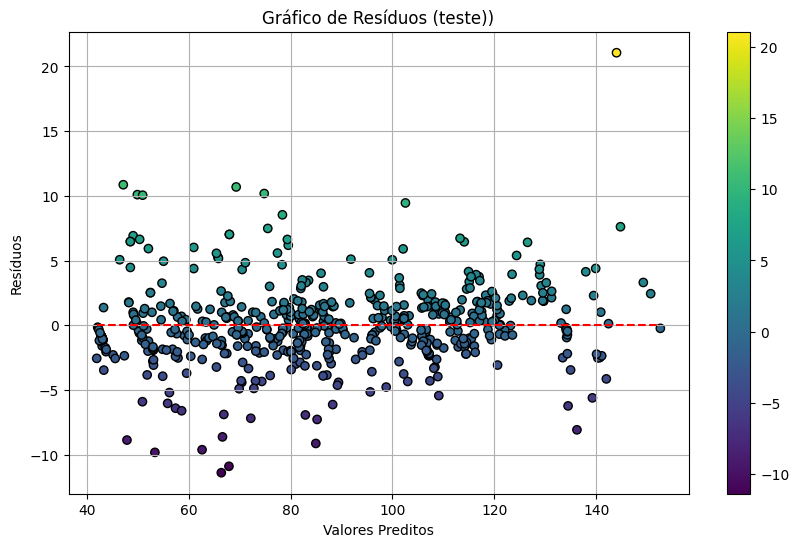

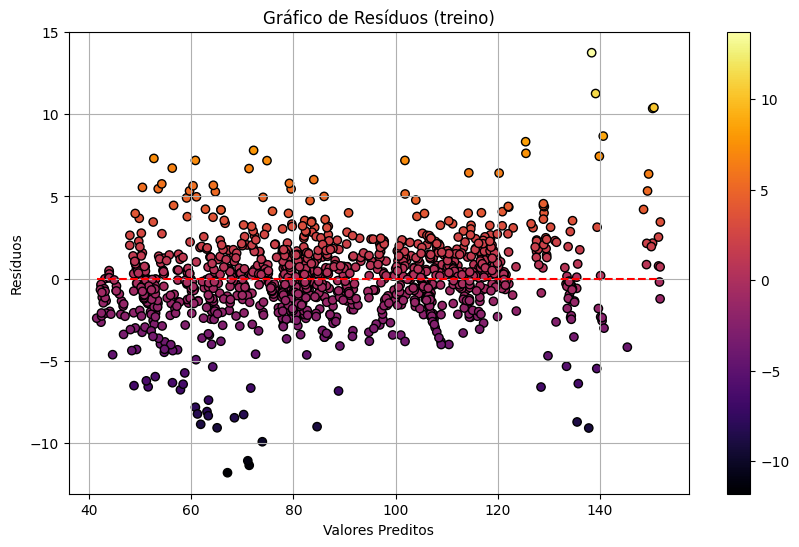

In [165]:
residuos = yp_teste - y_predgbp

plt.figure(figsize=(10, 6))
scatter = plt.scatter(y_predgbp, residuos, c=residuos, cmap='viridis', edgecolors='black')
plt.hlines(y=0, xmin=y_predgbp.min(), xmax=y_predgbp.max(), colors='r', linestyles='dashed')
plt.xlabel('Valores Preditos')
plt.ylabel('Resíduos')
plt.title('Gráfico de Resíduos (teste))')
plt.colorbar(scatter)
plt.grid(True)
plt.show()

residuos_treino = yp_treino - y_predgbp_treino

plt.figure(figsize=(10, 6))
scatter = plt.scatter(y_predgbp_treino, residuos_treino, c=residuos_treino, cmap='inferno', edgecolors='black')
plt.hlines(y=0, xmin=y_predgbp_treino.min(), xmax=y_predgbp_treino.max(), colors='r', linestyles='dashed')
plt.xlabel('Valores Preditos')
plt.ylabel('Resíduos')
plt.title('Gráfico de Resíduos (treino)')
plt.colorbar(scatter)
plt.grid(True)
plt.show()